In [ ]:
#Setting up data for regression
import pandas as pd
import numpy as np
import io
import os
import tensorflow.keras
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import sklearn
from sklearn.linear_model import Lasso

file_path = '/content/sample_data/california_housing_train.csv'
df = pd.read_csv(file_path, na_values = ['NA', '?'])

#Pandas to NumPy
x_columns = df.columns.drop('housing_median_age')
x = df[x_columns].values
y = df['housing_median_age'].values

#Split into test train regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

%matplotlib inline
def report_coeff(names, coeff, intercept):
  r = pd.DataFrame({'coeff' : coeff , 'positive' : coeff>0 })
  r = r.sort_values(by = 'coeff', ascending = True)
  display(r)
  print('Intercept: ', intercept)
  r['coeff'].plot(kind = 'barh', color = r['positive'].map({'True': 'b', 'False': 'r'}))

#Create Linear Regression
regressor = sklearn.linear_model.LinearRegression()

#Fit / Train Linear Regression
regressor.fit(x_train, y_train)

#Predict
pred = regressor.predict(x_test)

#RMSE
score = np.sqrt(metrics.mean_sqaured.error(pred, y_test))
print('RMSE: ', score)

report_coeff(names, regressor.coef_, regressor.intercept_)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


The RMSE is :  10.945684996352982


,coeff,positive
0,-5.170891,False
1,-4.527025,False
6,-3.541876,False
2,-2.312987,False
3,-1.930579,False
4,0.000000,False
5,-0.000000,False
7,3.169861,True


Intercept:  28.67758341482775


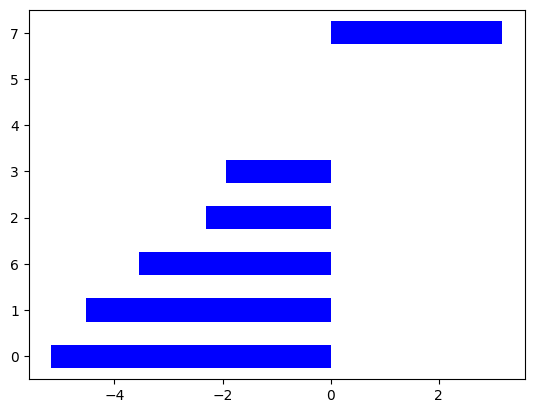

In [ ]:
#Creating L1(Lasso) Regularization

import pandas as pd
import numpy as np
import io
import os
import tensorflow.keras
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import sklearn
from sklearn.linear_model import Lasso

file_path = '/content/sample_data/california_housing_train.csv'
df = pd.read_csv(file_path, na_values = ['NA', '?'])

#Pandas to NumPy
x_columns = df.columns.drop('housing_median_age')
x = df[x_columns].values
x = zscore(x)
y = df['housing_median_age'].values

#Split into test train regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

%matplotlib inline
def report_coeff(names, coeff, intercept):
  r = pd.DataFrame({'coeff' : coeff , 'positive' : coeff>0 })
  r = r.sort_values(by = 'coeff', ascending = True)
  display(r)
  print('Intercept: ', intercept)
  r['coeff'].plot(kind = 'barh', color = 'blue')

#Creating the L1 Regression
regressor = Lasso(random_state = 0, alpha = 0.1)

#Fit/Train Lasso
regressor.fit(x_train, y_train)

#Predict the output
pred = regressor.predict(x_test)

#Measure RMSE
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print('The RMSE is : ', score)

report_coeff(df.columns, regressor.coef_, regressor.intercept_)

In [ ]:
#Creating an L1 Regularization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lasso = Lasso(random_state = 42)
alphas = np.logspace(-8, 8, 10)

scores = list()
scores_std = list()

n_folds = 3

for alpha in alphas:
  lasso.alpha = alpha
  this_scores = cross_val_score(lasso, x, y, cv = n_folds, n_jobs = 1)
  scores.append(np.mean(this_scores))
  scores_std.append(np.std(this_scores))

scores, scores_std = np.array(scores), np.array(scores_std)

plt.figure().set_size_inches(8,6)
plt.semilogx(alphas, score)

#Plot error lines showing +ve or -ve deviation
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

#Aplha 0.2 controls the translucency of the graph
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha = 0.2)

plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle = '--', color = '.5')
plt.xlim(alphas[0], alphas[-1])


In [ ]:
#L2 (Ridge) Regression

import pandas as pd
import numpy as np
import io
import os
import tensorflow.keras
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import sklearn
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

file_path = '/content/sample_data/california_housing_train.csv'
df = pd.read_csv(file_path, na_values = ['NA', '?'])

#Pandas to NumPy
x_columns = df.columns.drop('housing_median_age')
x = df[x_columns].values
x = zscore(x)
y = df['housing_median_age'].values

#Split into test train regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

#Creating te Regression
regressor = Ridge(alpha = 1)

#Fit/Train Ridge
regressor.fit(x_train, y_train)

#Predict
pred = regressor.predict(x_test)

#Measure the RMSE
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print('The RMSE error is as: ', score)

In [ ]:
#Elastic Regression

import pandas as pd
import numpy as np
import io
import os
import tensorflow.keras
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import sklearn
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

file_path = '/content/sample_data/california_housing_train.csv'
df = pd.read_csv(file_path, na_values = ['NA', '?'])

#Pandas to NumPy
x_columns = df.columns.drop('housing_median_age')
x = df[x_columns].values
x = zscore(x)
y = df['housing_median_age'].values

#Split into test train regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

#Creating te Regression
regressor = ElasticNet(alpha = 0.1, ll_ratio = 0.1)

#Fit/Train Ridge
regressor.fit(x_train, y_train)

#Predict
pred = regressor.predict(x_test)

#Measure the RMSE
score = np.sqrt(metrics.mean_squared_error(pred, y_test))
print('The RMSE error is as: ', score)



In [ ]:
#Out of Sample Regression with K Fold Cross Validation

import pandas as pd
import numpy as np
import io
import os
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics


df = pd.read_csv('/content/IRIS.csv', na_values = ['NA', '?'])

#Dummies for species
dummies = pd.get_dummies(df['species'], prefix = 'species')
df.drop('species', axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

#Standardize Scores
x_columns = df.columns
for col in x_columns:
  df[col] = zscore(df[col])

#Pandas to NumPy
x_columns = df.columns.drop('sepal_length')
x = df[x_columns].values
y = df['sepal_length'].values

#Cross Validate
kf = KFold(5, shuffle = True, random_state = 42)
oos_y = []
oos_pred = []

fold = 0
for train, test in kf.split(x):
  fold += 1
  print('Fold: ', fold)

  x_train = x[train]
  y_train = y[train]
  x_test = x[test]
  y_test = y[test]

  model = Sequential()
  model.add(Dense(20, input_dim = x.shape[1], activation = 'relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(1))
  model.compile(loss = 'mean_squared_error', optimizer = 'adam')
  pred = model.predict(x_test)

  oos_y.append(y_test)
  oos_pred.append(pred)

  #Measure RMSE
  score = np.sqrt(metrics.mean_squared_error(y_test, pred))
  print('RMSE Score: ', score)

#Building OOS prediction list
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(pred)
score = np.sqrt(metrics.mean_squared_error(oos_y, oos_pred))

print('RMSE Score for OOS Prediction List: ', score)

#Building the OOS Prediction DataFrame
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oos_df = pd.concat([df, oos_y, oos_pred], axis = 1)


Fold:  1
1/1 [==============================] - 0s 74ms/step
RMSE Score:  0.6929879658636733
Fold:  2
1/1 [==============================] - 0s 90ms/step
RMSE Score:  0.9786778760945528
Fold:  3
1/1 [==============================] - 0s 103ms/step
RMSE Score:  0.9500440467653196
Fold:  4
1/1 [==============================] - 0s 145ms/step
RMSE Score:  1.4653667023224324
Fold:  5
1/1 [==============================] - 0s 217ms/step
RMSE Score:  1.0312686883159592
RMSE Score for OOS Prediction List:  1.0312686883159592


In [ ]:
#Out of Sample K Fold Stratified Cross Validation

import pandas as pd
import numpy as np
import io
import os
import tensorflow.keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#Creating the DataFrame
df = pd.read_csv('/content/IRIS.csv', na_values = ['NA', '?'])

#Standardize values
df['sepal_length'] = zscore(df['sepal_length'])
df['sepal_width'] = zscore(df['sepal_width'])
df['petal_width'] = zscore(df['petal_width'])
df['petal_length'] = zscore(df['petal_length'])

#Pandas to NumPy
x_columns = df.columns.drop('species')
x = df[x_columns].values

dummies = pd.get_dummies(df['species'])
y = dummies.values

#Use for stratified classification
kf = StratifiedKFold(5, shuffle = True, random_state = 42)

oos_y = []
oos_pred = []
fold = 0

for train, test in kf.split(x, df['species']):
  fold += 1
  print('Fold : ', fold)

  x_train = x[train]
  y_train = y[train]
  x_test = x[test]
  y_test = y[test]

  model = Sequential()
  model.add(Dense(50, input_dim = x.shape[1], activation = 'relu'))
  model.add(Dense(25, activation = 'relu'))
  model.add(Dense(y.shape[1], activation = 'softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
  model.fit(x_train, y_train, validation_data = (x_test, y_test), verbose = 0, epochs = 100)

  pred = model.predict(x_test)
  oos_y.append(y_test)

  #Raw probabilities for chosen class
  pred = np.argmax(pred, axis = 1)
  oos_pred.append(pred)

  #Measure accuracy of the fold
  y_compare = np.argmax(y_test, axis = 1)
  score = np.sqrt(metrics.mean_squared_error(y_compare, pred))
  print('RMSE Score: ', score)

#Building the OOS prediction list
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y, axis = 1)

score = np.sqrt(metrics.mean_squared_error(oos_y_compare, oos_pred))
print('Final Score Accuracy: ', score)

#Cross Validation Prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat([df, oos_y, oos_pred], axis = 1)


Fold :  1
1/1 [==============================] - 0s 55ms/step
RMSE Score:  0.0
Fold :  2
1/1 [==============================] - 0s 89ms/step
RMSE Score:  0.18257418583505536
Fold :  3
1/1 [==============================] - 0s 58ms/step
RMSE Score:  0.3651483716701107
Fold :  4
1/1 [==============================] - 0s 59ms/step
RMSE Score:  0.18257418583505536
Fold :  5
1/1 [==============================] - 0s 55ms/step
RMSE Score:  0.31622776601683794
Final Score Accuracy:  0.2449489742783178


In [ ]:
#Using a Holdout set for K Fold Cross Validation


import pandas as pd
import numpy as np
import io
import os
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics


df = pd.read_csv('/content/IRIS.csv', na_values = ['NA', '?'])

#Dummies for species
dummies = pd.get_dummies(df['species'], prefix = 'species')
df.drop('species', axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

#Standardize Scores
x_columns = df.columns
for col in x_columns:
  df[col] = zscore(df[col])

#Pandas to NumPy
x_columns = df.columns.drop('sepal_length')
x = df[x_columns].values
y = df['sepal_length'].values

#Creating Test Holdout
x_main, x_holdout, y_main, y_holdout = train_test_split(x, y, test_size = 0.1)

#Cross Validate
kf = KFold(5)
oos_y = []
oos_pred = []

fold = 0
for train, test in kf.split(x):
  fold += 1
  print('Fold: ', fold)

  x_train = x[train]
  y_train = y[train]
  x_test = x[test]
  y_test = y[test]

  model = Sequential()
  model.add(Dense(20, input_dim = x.shape[1], activation = 'relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(1))
  model.compile(loss = 'mean_squared_error', optimizer = 'adam')
  pred = model.predict(x_test)

  oos_y.append(y_test)
  oos_pred.append(pred)

  #Measure RMSE
  score = np.sqrt(metrics.mean_squared_error(y_test, pred))
  print('RMSE Score: ', score)

#Building OOS prediction list
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(pred)
score = np.sqrt(metrics.mean_squared_error(oos_y.flatten(), oos_pred.flatten()))

print('RMSE Score for OOS Prediction List: ', score)

#Building the Cross Validated Prediction
holdout_pred = model.predict(x_holdout)
score = np.sqrt(metrics.mean_sqaured_error(holdout_pred.flatten(), y_holdout.flatten()))
print('The Final Score is: ', score)


In [ ]:
#Keras with L1/L2 regression

import pandas as pd
import numpy as np
import io
import os
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from tensorflow.keras import regularizers

df = pd.read_csv('/content/IRIS.csv', na_values = ['NA', '?'])

#Dummies for species
dummies = pd.get_dummies(df['species'], prefix = 'species')
df.drop('species', axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

#Standardize Scores
x_columns = df.columns
for col in x_columns:
  df[col] = zscore(df[col])

#Pandas to NumPy
x_columns = df.columns.drop('sepal_length')
x = df[x_columns].values
y = df['sepal_length'].values

#Cross Validate
kf = KFold(5, shuffle = True, random_state = 42)
oos_y = []
oos_pred = []

fold = 0
for train, test in kf.split(x):
  fold += 1
  print('Fold: ', fold)

  x_train = x[train]
  y_train = y[train]
  x_test = x[test]
  y_test = y[test]

  model = Sequential()
  model.add(Dense(20, input_dim=x.shape[1], activation='relu', activity_regularizer=regularizers.l1(1e-4)))
  model.add(Dense(10, activation='relu', activity_regularizer=regularizers.l1(1e-4)))
  model.add(Dense(1))
  model.compile(loss = 'mean_squared_error', optimizer = 'adam')
  pred = model.predict(x_test)

  oos_y.append(y_test)
  oos_pred.append(pred)

  #Measure RMSE
  score = np.sqrt(metrics.mean_squared_error(y_test, pred))
  print('RMSE Score: ', score)

#Building OOS prediction list
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(pred)
#score = np.sqrt(metrics.mean_squared_error(oos_y, oos_pred))

print('RMSE Score for OOS Prediction List: ', score)

#Building the OOS Prediction DataFrame
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oos_df = pd.concat([df, oos_y, oos_pred], axis = 1)

Fold:  1
1/1 [==============================] - 0s 114ms/step
RMSE Score:  0.8822198650340196
Fold:  2
1/1 [==============================] - 0s 122ms/step
RMSE Score:  1.2516947350561465
Fold:  3
1/1 [==============================] - 0s 252ms/step
RMSE Score:  0.7856030076892467
Fold:  4
1/1 [==============================] - 0s 90ms/step
RMSE Score:  1.102071398581051
Fold:  5
1/1 [==============================] - 0s 75ms/step
RMSE Score:  1.2545730245619533
RMSE Score for OOS Prediction List:  1.2545730245619533


In [ ]:
#Using Dropout with Classification


import pandas as pd
import numpy as np
import io
import os
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from tensorflow.keras import regularizers

df = pd.read_csv('/content/IRIS.csv', na_values = ['NA', '?'])

#Dummies for species
dummies = pd.get_dummies(df['species'], prefix = 'species')
df.drop('species', axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

#Standardize Scores
x_columns = df.columns
for col in x_columns:
  df[col] = zscore(df[col])

#Pandas to NumPy
x_columns = df.columns.drop('sepal_length')
x = df[x_columns].values
y = df['sepal_length'].values

#Cross Validate
kf = KFold(5, shuffle = True, random_state = 42)
oos_y = []
oos_pred = []

fold = 0
for train, test in kf.split(x):
  fold += 1
  print('Fold: ', fold)

  x_train = x[train]
  y_train = y[train]
  x_test = x[test]
  y_test = y[test]

  model = Sequential()
  model.add(Dense(20, input_dim=x.shape[1], activation='relu', activity_regularizer=regularizers.l1(1e-4)))
  model.add(Dense(10, activation='relu', activity_regularizer=regularizers.l1(1e-4)))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.compile(loss = 'mean_squared_error', optimizer = 'adam')
  pred = model.predict(x_test)

  oos_y.append(y_test)
  oos_pred.append(pred)

  #Measure RMSE
  score = np.sqrt(metrics.mean_squared_error(y_test, pred))
  print('RMSE Score: ', score)

#Building OOS prediction list
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(pred)
#score = np.sqrt(metrics.mean_squared_error(oos_y, oos_pred))

print('RMSE Score for OOS Prediction List: ', score)

#Building the OOS Prediction DataFrame
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oos_df = pd.concat([df, oos_y, oos_pred], axis = 1)

In [ ]:
#BootStrapping for Regression

import time
import statistics
import pandas as pd
import numpy as np
import io
import os
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from tensorflow.keras import regularizers

df = pd.read_csv('/content/IRIS.csv', na_values = ['NA', '?'])

#Dummies for species
dummies = pd.get_dummies(df['species'], prefix = 'species')
df.drop('species', axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

#Standardize Scores
x_columns = df.columns
for col in x_columns:
  df[col] = zscore(df[col])

#Pandas to NumPy
x_columns = df.columns.drop('sepal_length')
x = df[x_columns].values
y = df['sepal_length'].values

SPLITS = 50

#BootStrap
boot = ShuffleSplit(n_splits = SPLITS, test_size = 0.1, random_state = 42)

#Track progress
mean_benchmark = []
epochs_needed = []
num = 0

#Loop through samples
for train, test in boot.split(x):
  start_time = time.time()
  num += 1

  #Split into test & train
  x_train = x[train]
  y_train = y[train]
  x_test = x[test]
  y_test = y[test]

  #Construct Neural Network
  model = Sequential()
  model.add(Dense(20, input_dim = x.shape[1], activation = 'relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(1)
  model.compile(loss = 'mean_squared_error', optimizer = 'adam')
  monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 0, mode = 'auto', restore_best_weights = True)

  #Train on BootStrap sample
  model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 0, epochs = 100)
  epochs = monitor.stopped_epcoch
  epochs_needed.append(epochs)

  #Prediction excluding the boot
  pred = model.predict(x_test)

  #Measure bootstrap's log loss
  score = np.sqrt(metrics.mean_sqaured_error(pred, y_test))
  mean_benchmark.append(score)
  m1 = statistics.mean(mean_benchmark)
  m2 = statistics.mean(epochs_needed)
  mdev = statistics.pstdev(mean_benchmark)

  time_taken = time.time() - start_time

  print(num, score, m1, m2, mdev)


In [ ]:
#BootStrapping for Classification

#Using Dropout with Classification


import pandas as pd
import numpy as np
import io
import os
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StartifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from tensorflow.keras import regularizers


df = pd.read_csv('/content/IRIS.csv', na_values = ['NA', '?'])

#Dummies for species
dummies = pd.get_dummies(df['species'], prefix = 'species')
df.drop('species', axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

#Standardize Scores
x_columns = df.columns
for col in x_columns:
  df[col] = zscore(df[col])

#Pandas to NumPy
x_columns = df.columns.drop('sepal_length')
x = df[x_columns].values
y = df['sepal_length'].values

#Bootstrapping
SPLIT = 50
boot = StratifiedShuffleSplit(n_splits = SPLIT, test_size = 0.1, random_state = 42)

#Track progress
mean_benchmark = []
epochs_needed = []
num = 0

#Loop through samples
for train, test in boot.split(x):
  start_time = time.time()
  num += 1

  #Split into test & train
  x_train = x[train]
  y_train = y[train]
  x_test = x[test]
  y_test = y[test]

  #Construct Neural Network
  model = Sequential()
  model.add(Dense(20, input_dim = x.shape[1], activation = 'relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(1)
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
  monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 0, mode = 'auto', restore_best_weights = True)

  #Train on BootStrap sample
  model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 0, epochs = 100)
  epochs = monitor.stopped_epcoch
  epochs_needed.append(epochs)

  #Prediction excluding the boot
  pred = model.predict(x_test)

  #Measure bootstrap's log loss
  score = np.sqrt(metrics.mean_sqaured_error(pred, y_test))
  mean_benchmark.append(score)
  m1 = statistics.mean(mean_benchmark)
  m2 = statistics.mean(epochs_needed)
  mdev = statistics.pstdev(mean_benchmark)

  time_taken = time.time() - start_time

  print(num, score, m1, m2, mdev)

In [ ]:
#Using BootStrapping and Benchmarking together at the same time


import pandas as pd
import numpy as np
import io
import os
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StartifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from tensorflow.keras import regularizers


df = pd.read_csv('/content/IRIS.csv', na_values = ['NA', '?'])

#Dummies for species
dummies = pd.get_dummies(df['species'], prefix = 'species')
df.drop('species', axis = 1, inplace = True)
df = pd.concat([df, dummies], axis = 1)

#Standardize Scores
x_columns = df.columns
for col in x_columns:
  df[col] = zscore(df[col])

#Pandas to NumPy
x_columns = df.columns.drop('sepal_length')
x = df[x_columns].values
y = df['sepal_length'].values

#Bootstrapping
SPLIT = 50
boot = StratifiedShuffleSplit(n_splits = SPLIT, test_size = 0.1, random_state = 42)

#Track progress
mean_benchmark = []
epochs_needed = []
num = 0

for train, test in boot.split(x, df['sepal_length']):
  start_time = time.time()
  num += 1

  #Split train and test
  x_train = x[train]
  y_train = y[train]
  x_test = x[test]
  y_test = y[test]

  #Constructing Neural Network
  model = Sequential()
  model.add(Dense(100, input_dim = x.shape[1], activation = PReLU(), kernel_regularizer = regularizer.l2(1e-4)))
  model.dropout(0.5)
  model.add(Dense(100, activation = PReLU(), activity_regularizer = regularizer.l2(1e-4)))
  model.dropout(0.5)
  model.add(Dense(100, activation = PReLU(), activity_regularizer = regularizer.l2(1e-4)))
  model.add(Dense(y.shape[1], activation = 'softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
  monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 100, verbose = 0, mode = 'auto', restore_best_weights = True)

  #Train on BootStrap Model
  model.fit(x_train, y_train, validation_data = (x_test, y_test), callbacks = [monitor], verbose = 0, epochs = 100)
  epochs = monitor.stopped_epoch
  epochs_needed.append(epochs)

  #Predict on the out of boot
  pred = model.predict(x_test)

  #Measure the log loss
  y_compare = np.argmax(y_test, axis = 1)
  score = metrics.log_loss(y_compare, pred)
  mean_benchmark.append(score)
  m1 = statistics.mean(mean_benchmark)
  m2 = statistics.mean(epochs_needed)
  mdev = statistics.pstdev(mean_benchmark)

  time_took = time.time() - start_time

  print(num, score, m1, m2, mdev, time_took)

